<a href="https://colab.research.google.com/github/alizul01/machine-learning-course/blob/main/cnn_assigntment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [23]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [24]:
print(f"X Train, {X_train.shape}")
print(f"y train, {y_train.shape}")

X Train, (60000, 28, 28)
y train, (60000,)


In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)

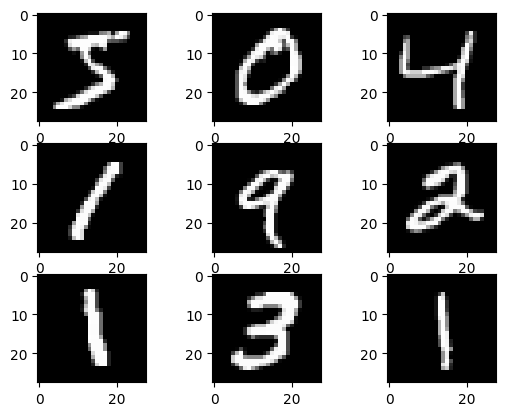

In [26]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [27]:
nets = 3
model = [0] *nets

for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    if j>0:
        model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [29]:
history = [0] * nets
epochs = 10

for j in range(nets):
    history[j] = model[j].fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/10
1688/1688 [==============================] - 67s 39ms/step - loss: 0.6472 - accuracy: 0.8066 - val_loss: 0.3245 - val_accuracy: 0.9025
Epoch 2/10
1688/1688 [==============================] - 64s 38ms/step - loss: 0.2944 - accuracy: 0.9114 - val_loss: 0.2452 - val_accuracy: 0.9268
Epoch 3/10
1688/1688 [==============================] - 63s 38ms/step - loss: 0.2204 - accuracy: 0.9340 - val_loss: 0.1868 - val_accuracy: 0.9462
Epoch 4/10
1688/1688 [==============================] - 66s 39ms/step - loss: 0.1726 - accuracy: 0.9492 - val_loss: 0.1458 - val_accuracy: 0.9592
Epoch 5/10
1688/1688 [==============================] - 65s 38ms/step - loss: 0.1419 - accuracy: 0.9573 - val_loss: 0.1277 - val_accuracy: 0.9630
Epoch 6/10
1688/1688 [==============================] - 64s 38ms/step - loss: 0.1201 - accuracy: 0.9641 - val_loss: 0.1064 - val_accuracy: 0.9688
Epoch 7/10
1688/1688 [==============================] - 64s 38ms/step - loss: 0.1047 - accuracy: 0.9677 - val_loss: 0.0984 -

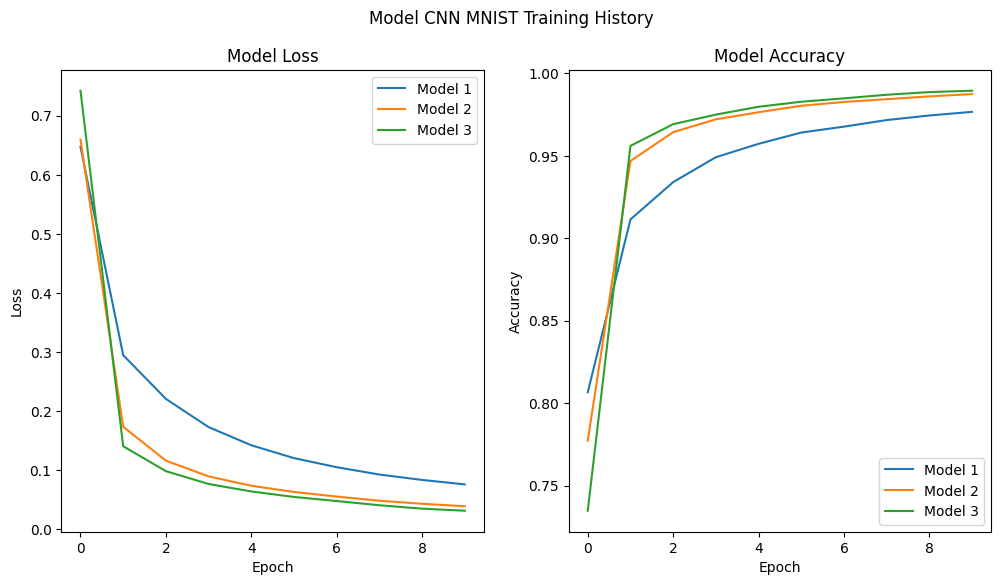

In [30]:
def plot_history(history, title):
    plt.figure(figsize=(12, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)
    for h in history:
        plt.plot(h.history['loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Model {}'.format(i) for i in range(1, len(history) + 1)])

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    for h in history:
        plt.plot(h.history['accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Model {}'.format(i) for i in range(1, len(history) + 1)])

    plt.suptitle(title)
    plt.show()

plot_history(history, 'Model CNN MNIST Training History')

In [31]:
model[0].save('model_1.h5')
model[1].save('model_2.h5')
model[2].save('model_3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
